<a href="https://colab.research.google.com/github/bmulaw/aqi_hqta_merged/blob/main/AQI_HQTA_DATA_CLEANING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing relevant libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import pingouin as pg

In [ ]:
df = pd.read_csv("data/merged_clean_aqiHQTA.csv")
df2 = pd.read_csv("data/merged_AQI_HQTA.csv")

In [ ]:
df.tail()

,PM10 AQI Value,Date,Month,City,ALAND,Total,TotalNotHi,White,Black,Native,Asian,NativePaci,OtherNotHi,Hispanic
1581,30,2015-04-12,April,Santa Clarita,1343029,32441,16267,12681,672,66,1731,8,2182,16174
1582,30,2015-04-12,April,Santa Clarita,954915,32441,16267,12681,672,66,1731,8,2182,16174
1583,30,2015-04-12,April,Santa Clarita,376934,32441,16267,12681,672,66,1731,8,2182,16174
1584,30,2015-04-12,April,Santa Clarita,384566,32441,16267,12681,672,66,1731,8,2182,16174
1585,30,2015-04-12,April,Santa Clarita,634699,32441,16267,12681,672,66,1731,8,2182,16174


In [ ]:
df.shape

(1586, 14)

In [ ]:
df['Date'].unique()
df.Year.unique()

AttributeError: 'DataFrame' object has no attribute 'Year'

In [ ]:
df_by_city = df.groupby('City')
df_copy = df.copy()

In [ ]:
new_df = df.drop_duplicates(['City'])
new_df
new_df1 = df.drop_duplicates(['Date'])
new_df1

,PM10 AQI Value,Date,Month,City,ALAND,Total,TotalNotHi,White,Black,Native,Asian,NativePaci,OtherNotHi,Hispanic
0,63,2015-01-06,January,Long Beach,86659,1619012,731170,271473,207298,4556,191063,14076,83487,887842
66,51,2015-01-12,January,Long Beach,86659,1619012,731170,271473,207298,4556,191063,14076,83487,887842
132,22,2015-01-30,January,Long Beach,86659,1619012,731170,271473,207298,4556,191063,14076,83487,887842
198,38,2015-02-11,February,Long Beach,86659,1619012,731170,271473,207298,4556,191063,14076,83487,887842
264,18,2015-02-23,February,Long Beach,86659,1619012,731170,271473,207298,4556,191063,14076,83487,887842
330,33,2015-03-07,March,Long Beach,86659,1619012,731170,271473,207298,4556,191063,14076,83487,887842
396,44,2015-03-13,March,Long Beach,86659,1619012,731170,271473,207298,4556,191063,14076,83487,887842
462,34,2015-03-25,March,Long Beach,86659,1619012,731170,271473,207298,4556,191063,14076,83487,887842
528,38,2015-10-09,October,Long Beach,86659,1619012,731170,271473,207298,4556,191063,14076,83487,887842
594,52,2015-10-27,October,Long Beach,86659,1619012,731170,271473,207298,4556,191063,14076,83487,887842


In [ ]:
try getting the total population for each group by date

In [ ]:
df2.head()
df2 = df2.drop(columns = ['GEOID','BLKGRPCE','NAMELSAD','ALAND', 'ACRES','Site ID','Year'])

In [ ]:
df2

,PM10 AQI Value,New Date,Month,City,Total,TotalNotHi,White,Black,Native,Asian,NativePaci,OtherNotHi,Hispanic
0,63,2015-01-06,January,Long Beach,697,576,371,205,0,0,0,0,121
1,63,2015-01-06,January,Long Beach,2609,1335,664,353,71,153,0,188,1274
2,63,2015-01-06,January,Long Beach,705,375,196,63,0,69,0,94,330
3,63,2015-01-06,January,Long Beach,1014,719,417,144,36,122,0,0,295
4,63,2015-01-06,January,Long Beach,634,183,83,55,0,43,0,4,451
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1581,30,2015-04-12,April,Santa Clarita,2865,1142,974,85,7,0,0,152,1723
1582,30,2015-04-12,April,Santa Clarita,2124,1620,1116,114,0,313,0,154,504
1583,30,2015-04-12,April,Santa Clarita,1026,347,311,7,0,15,0,28,679
1584,30,2015-04-12,April,Santa Clarita,617,180,127,37,5,0,0,22,437


In [ ]:
new_df2 =  df2.groupby('New Date')[['Month','City','Total', 'TotalNotHi','White','Black','Native', 'Asian', 'NativePaci','OtherNotHi','Hispanic']].sum()
new_df2

KeyError: 'New Date'

In [ ]:
new_df3 =  df2.groupby(['City','PM10 AQI Value','New Date'])[['Asian','White','Black','Native','NativePaci','Hispanic']].sum()
new_df3

Asian  White  Black  Native  \
City          PM10 AQI Value New Date                                  
Lancaster     15             2015-11-22    466   2654   3868      22   
              16             2015-03-14    466   2654   3868      22   
              17             2015-04-07    466   2654   3868      22   
              18             2015-11-29    466   2654   3868      22   
              19             2015-02-13    466   2654   3868      22   
                             2015-10-11    466   2654   3868      22   
              21             2015-03-16    466   2654   3868      22   
                             2015-10-25    466   2654   3868      22   
              24             2015-12-06    466   2654   3868      22   
              28             2015-11-30    466   2654   3868      22   
              30             2015-10-21    466   2654   3868      22   
              32             2015-12-03    466   2654   3868      22   
              35             2015-10-16    466   2654   3868      22   
                             2015-10-22    466   2654   3868      22   
              40             2015-10-24    466   2654   3868      22   
              55             2015-04-03    466   2654   3868      22   
                             2015-08-12    466   2654   3868      22   
              85             2015-07-22    466   2654   3868      22   
Long Beach    16             2015-12-14  11239  15969  12194     268   
              18             2015-02-23  11239  15969  12194     268   
              20             2015-11-26  11239  15969  12194     268   
              22             2015-01-30  11239  15969  12194     268   
              27             2015-11-08  11239  15969  12194     268   
              31             2015-11-02  11239  15969  12194     268   
              33             2015-03-07  11239  15969  12194     268   
              34             2015-03-25  11239  15969  12194     268   
              38             2015-02-11  11239  15969  12194     268   
                             2015-10-09  11239  15969  12194     268   
              44             2015-03-13  11239  15969  12194     268   
                             2015-12-02  11239  15969  12194     268   
              45             2015-11-20  11239  15969  12194     268   
              51             2015-01-12  11239  15969  12194     268   
              52             2015-10-27  11239  15969  12194     268   
              54             2015-12-08  11239  15969  12194     268   
              63             2015-01-06  11239  15969  12194     268   
Los Angeles   17             2015-05-21  37782  27890  18372     504   
              27             2015-11-01  37782  27890  18372     504   
              60             2015-01-21  37782  27890  18372     504   
Santa Clarita 30             2015-04-12   1731  12681    672      66   

                                         NativePaci  Hispanic  
City          PM10 AQI Value New Date                          
Lancaster     15             2015-11-22          17      6177  
              16             2015-03-14          17      6177  
              17             2015-04-07          17      6177  
              18             2015-11-29          17      6177  
              19             2015-02-13          17      6177  
                             2015-10-11          17      6177  
              21             2015-03-16          17      6177  
                             2015-10-25          17      6177  
              24             2015-12-06          17      6177  
              28             2015-11-30          17      6177  
              30             2015-10-21          17      6177  
              32             2015-12-03          17      6177  
              35             2015-10-16          17      6177  
                             2015-10-22          17      6177  
              40             2015-10-24          17      6177  


In [ ]:
new_df3 =  df2.groupby(['PM10 AQI Value','New Date','City'])[['Asian','White','Black','Native','NativePaci','Hispanic']].sum()
new_df3['Minority'] = new_df3.iloc[:, -4:].sum(axis=1)
new_df3['Majority'] = new_df3.iloc[:, :-5].sum(axis=1)
new_df4 = new_df3.groupby(['PM10 AQI Value'])[['Minority','Majority']].sum()
new_df4['Maj_To_Min'] = new_df4.iloc[:,-1]/new_df4.iloc[:,-2]
new_df4

,Minority,Majority,Maj_To_Min
PM10 AQI Value,,,
15,10084,3120,0.309401
16,75600,30328,0.401164
17,145827,68792,0.471737
18,75600,30328,0.401164
19,20168,6240,0.309401
20,65516,27208,0.415288
21,20168,6240,0.309401
22,65516,27208,0.415288
24,10084,3120,0.309401


array([[<AxesSubplot:title={'center':'Maj_To_Min'}>]], dtype=object)

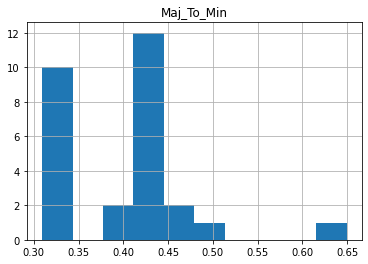

In [ ]:
hist =  new_df4.hist( 'Maj_To_Min')
hist

<AxesSubplot:xlabel='PM10 AQI Value', ylabel='Maj_To_Min'>

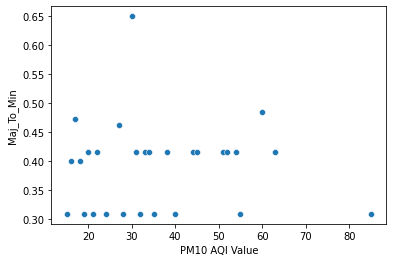

In [ ]:
sns.scatterplot(data=new_df4, x="PM10 AQI Value", y="Maj_To_Min")

In [ ]:
#take distinct AQI values since some of them are repitions

In [ ]:
new_df4_copy =  new_df4.copy()

In [ ]:
#plot maj to min with pm10 with all duplicate population ratio with respect to location dropped
new_df4 = new_df4.drop_duplicates('Maj_To_Min')
new_df

<AxesSubplot:xlabel='PM10 AQI Value', ylabel='Maj_To_Min'>

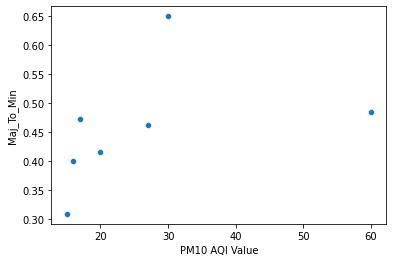

In [ ]:
sns.scatterplot(data=new_df4, x="PM10 AQI Value", y="Maj_To_Min")

In [ ]:
new_df5 = new_df4_copy
new_df5=new_df5.reset_index()

<ipython-input-79-fa422827e4ef>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  new_df5_plot = new_df5.groupby('Maj_To_Min')['PM10 AQI Value','Minority'].mean()


,PM10 AQI Value,Minority
Maj_To_Min,,
0.309401,35.400000,14117.600000
0.401164,17.000000,75600.000000
0.415288,40.583333,76435.333333
0.461495,27.000000,201259.000000
0.471737,17.000000,145827.000000
0.483797,60.000000,135743.000000
0.649237,30.000000,27004.000000


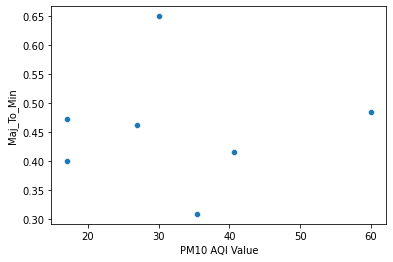

In [ ]:
#plot Maj to Min with average AQI
new_df5_plot = new_df5.groupby('Maj_To_Min')['PM10 AQI Value','Minority'].mean()
sns.scatterplot(data=new_df5_plot, x="PM10 AQI Value", y="Maj_To_Min")
new_df5_plot

In [ ]:
#stop

In [ ]:
#new_analysis
#compare values above ans below a threshold and compare result across population

In [ ]:
new_df3 =  df2.groupby(['City','New Date'])[['Asian','White','Black','Native','NativePaci','Hispanic','PM10 AQI Value']].count()
#new_df3_count_above_threshold = df2.groupby('City')['PM10 AQI Value'].value_counts()
#new_df3_count_above_threshold = df2[['City','PM10 AQI Value']]
threshold = (df2['PM10 AQI Value'].max() - df2['PM10 AQI Value'].min())//2
#average_PM_per_locatiion  = df2.groupby('City')['PM10 AQI Value'].mean()
#average_PM_per_locatiion
#threshold new_df3['Above_Threshold']

#new_df3_count.add_suffix('_Count').reset_index()
#new_df3_count
new_df3_count = df2.groupby('City')['PM10 AQI Value'].value_counts()
#new_df3_count_above_threshold

In [ ]:
#find what the pm value looks like above and below a threshold value
#plot aqi above and below threshold for each city
d2 = new_df3_count.to_frame(name = 'PM_Value_Counts').reset_index()
#can youiterate over all PM10 Values and separate above and below threshold values

,City,PM10 AQI Value,PM_Value_Counts
0,Lancaster,19,12
1,Lancaster,21,12
2,Lancaster,35,12
3,Lancaster,55,12
4,Lancaster,15,6
5,Lancaster,16,6
6,Lancaster,17,6
7,Lancaster,18,6
8,Lancaster,24,6
9,Lancaster,28,6


In [ ]:
#find what the distribution of population looks like across cities
#check if the cities with higher population of minorities have lower AQIs
#plot city and maj to min ratio in a piechart
new_df6 =  df2.groupby(['PM10 AQI Value','New Date','City'])[['Asian','White','Black','Native','NativePaci','Hispanic']].sum()
new_df6
new_df6['Minority'] = new_df6.iloc[:, -4:].sum(axis=1)
new_df6['Majority'] = new_df6.iloc[:, :-5].sum(axis=1)
new_df7 = new_df6.groupby(['City'])[['Minority','Majority']].sum()
new_df7['Maj_To_Min'] = new_df7.iloc[:,-1]/new_df7.iloc[:,-2]
new_df7.plot.pie(y='Maj_To_Min', figsize=(5, 5))

NameError: ignored